In [5]:
import pandas_datareader as web
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import math
import pandas_datareader as web

In [1]:
def MACD_profitability(stock, start, end):
    df = web.DataReader(stock, data_source="yahoo", start=start, end=end)
    #Calculate the MACD and signal line indicators
    #Calculate the short term exponential moving average (EMA)
    shortEMA = df.Close.ewm(span=12, adjust=False).mean() #Twelve periods
    #Calculate the long term exponential moving average (EMA)
    longEMA = df.Close.ewm(span=26, adjust=False).mean()
    #Calculate the MACD line 
    MACD = shortEMA - longEMA
    #Calculate the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()
    #Create new columns for the data 
    df["MACD"] = MACD
    df["Signal Line"] = signal
    def buy_sell(signal):
        Buy = []
        Sell = []
        flag = -1

        for i in range(0, len(signal)):
            if signal["MACD"][i] > signal["Signal Line"][i]:
                Sell.append(np.nan)
                if flag != 1:
                    Buy.append(signal["Close"][i])
                    flag = 1
                else:
                    Buy.append(np.nan)
            elif signal["MACD"][i] < signal["Signal Line"][i]:
                Buy.append(np.nan)
                if flag != 0:
                    Sell.append(signal["Close"][i])
                    flag = 0
                else:
                    Sell.append(np.nan)
            else: 
                Sell.append(np.nan)
                Buy.append(np.nan)
        return (Buy, Sell)
    a = buy_sell(df)
    df["Buy_Signal_Price"] = a[0]
    df["Sell_Signal_Price"] = a[1]
    plt.figure(figsize = (12.2, 4.5))
    plt.scatter(df.index, df["Buy_Signal_Price"], color="green", label = "Buy", marker = "^", alpha = 1)
    plt.scatter(df.index, df["Sell_Signal_Price"], color="red", label = "Sell", marker = "v", alpha = 1)
    plt.plot(df["Close"], label = "Close Price", alpha = 0.35)
    plt.title("Close Price Buy Sell Signals")
    plt.xlabel("Date")
    plt.ylabel("Close Price USD ($)")
    plt.legend(loc = "upper left")
    plt.xticks(rotation = 45)
    plt.show()
    #Then we create a new dataframe to analyze this moments
    measure = df[["Buy_Signal_Price", "Sell_Signal_Price"]]
    #We substitute Nans with 0s
    measure["Buy_0"] = measure["Buy_Signal_Price"].fillna(0)
    measure["Sell_0"] = measure["Sell_Signal_Price"]. fillna(0)
    money = 10000
    shares = 10000/df["Close"][0]
    for i in range(0, (len(measure["Buy_0"] + 1))):
        #for i in range(0, 17):
        if measure["Buy_0"][i] == 0 and measure["Sell_0"][i] == 0:
            pass
        elif measure["Buy_0"][i] != 0:
            shares = money/measure["Buy_0"][i]
        elif measure["Sell_0"][i] != 0:
            money = shares*measure["Sell_0"][i]
        #We find if the last movement is a sell or a purchase
    for i in range(0, (len(measure["Buy_0"] + 1))):
        if measure["Buy_0"][i] != 0:
            counter_buy = i
        if measure["Sell_0"][i] != 0:
            counter_sell = i
    #We calculate the money    
    if counter_sell > counter_buy:
        final_money = money
    else:
        final_money = shares*(df["Close"][-1])
    #We calculate the percentaje of profitability
    percentage = (final_money/10000) - 1
    #We calculate the real profitability of the stock without using MACD
    real_profitability = (df["Close"][-1]/df["Close"][0]) - 1 
    print(percentage, real_profitability)
    return (percentage, real_profitability)

### IBEX 35

In [2]:
ibex_codes = ["AENA.MC", "CLNX.MC", "NTGY.MC", "VIS.MC", "IBE.MC", "FER.MC", "REE.MC", "PHM.MC", "ACS.MC", "MAP.MC", "ACX.MC", "ELE.MC", "SGRE.MC", "ITX.MC", "GRF.MC", "MTS.MC", "AMS.MC", "COL.MC", "CABK.MC", "MRL.MC", "REP.MC", "BBVA.MC", "BKT.MC", "SAN.MC", "SAB.MC", "ANA.MC", "TEF.MC", "IAG.MC", "ENG.MC", "BKIA.MC", "CIE.MC", "ALM.MC", "SLR.MC", "IDR.MC", "MEL.MC"]

In [3]:
len(ibex_codes)

35

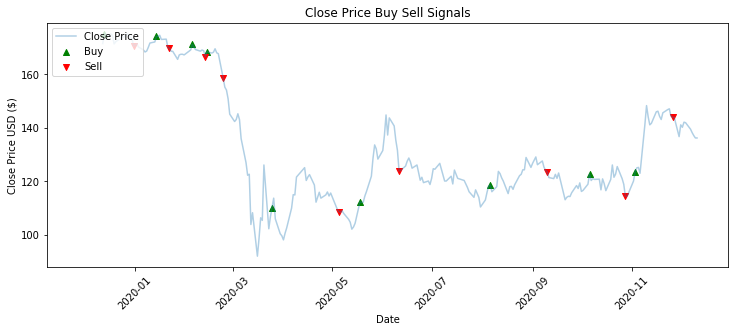

<ipython-input-1-12b3bc23f6d0>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure["Buy_0"] = measure["Buy_Signal_Price"].fillna(0)
<ipython-input-1-12b3bc23f6d0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure["Sell_0"] = measure["Sell_Signal_Price"]. fillna(0)


0.07369842886085864 -0.20595092794628622


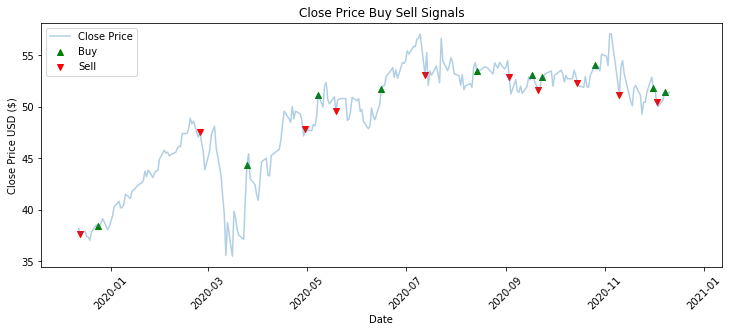

0.1434713743084184 0.34519766441884725


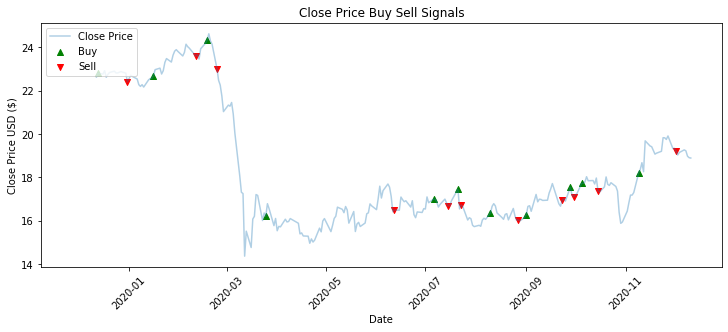

-0.04447858012091288 -0.1646772875007536


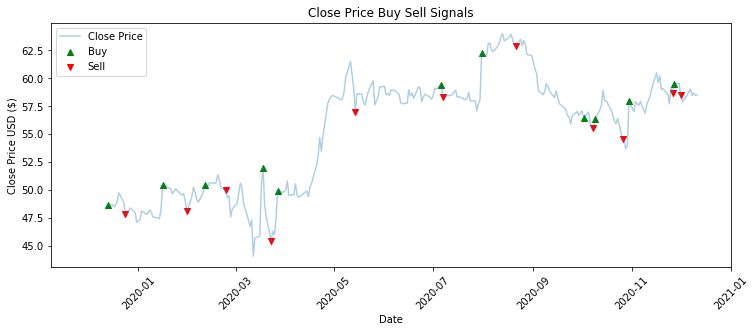

-0.12951239124256264 0.20817848435028652


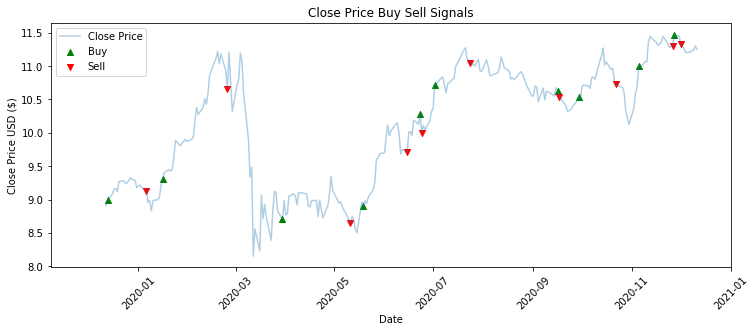

0.29060019912579893 0.26262628424932455


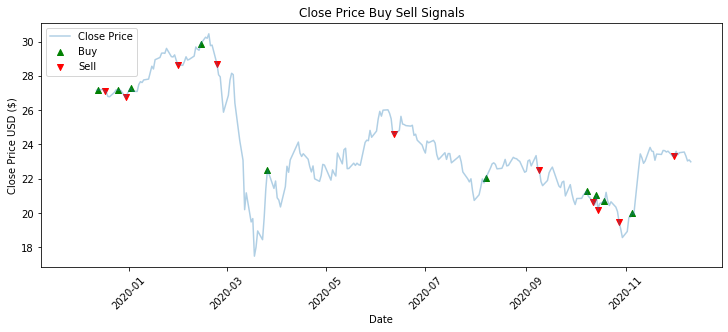

0.13174367175831403 -0.15353461339180663


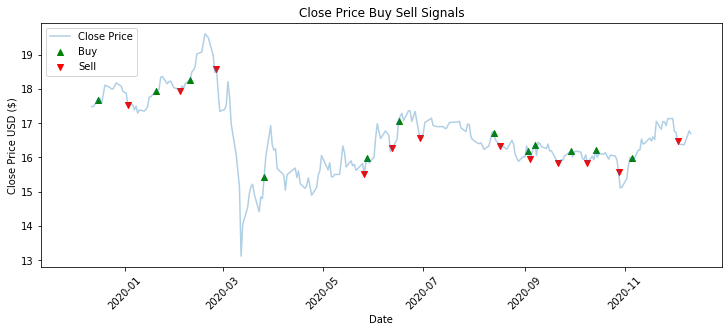

-0.09138134204715076 -0.045181634998608056


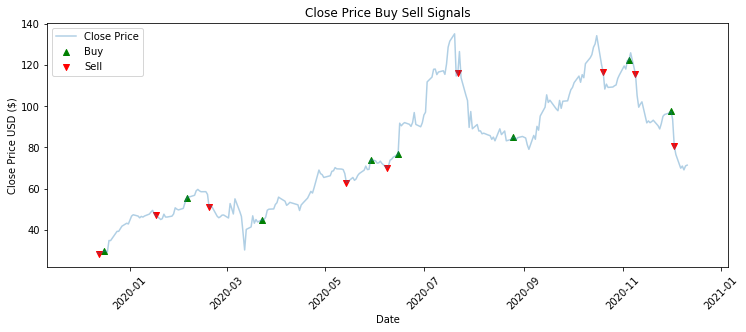

2.1196134539135794 1.466824083014191


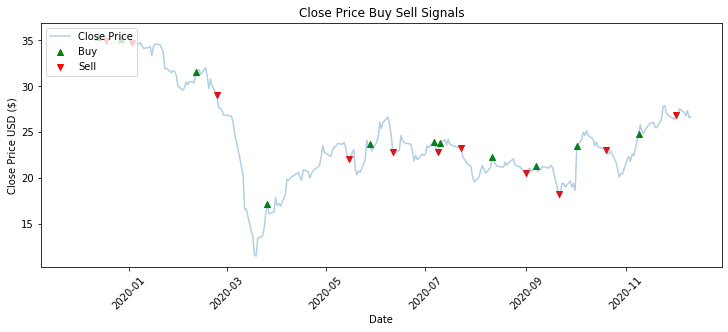

-0.12833421461205052 -0.24312055871841753


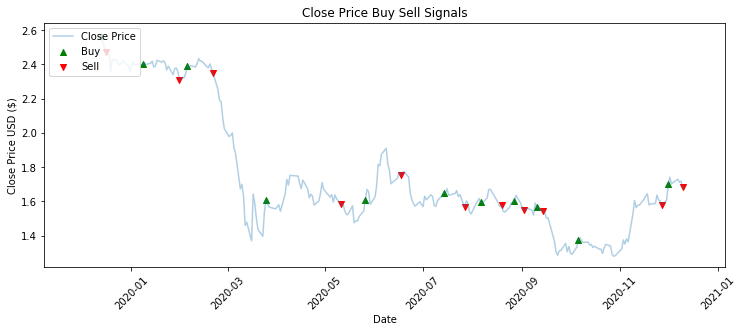

-0.005553089273931833 -0.3476227456157369


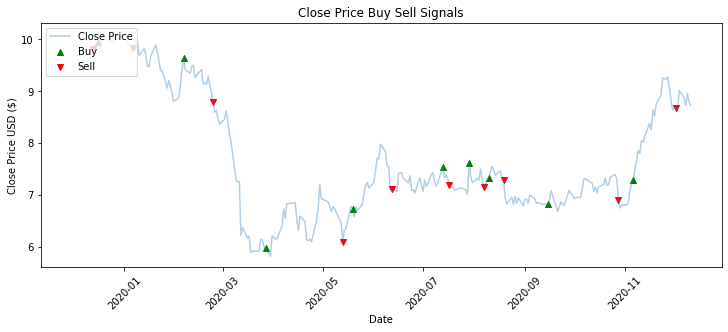

0.03648607124012915 -0.111970718782481


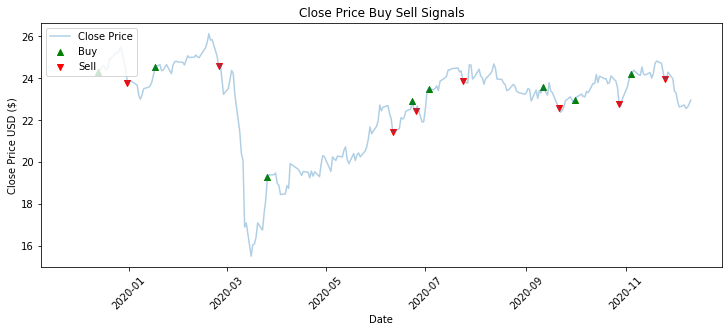

0.018728611374204673 -0.049295719005662986


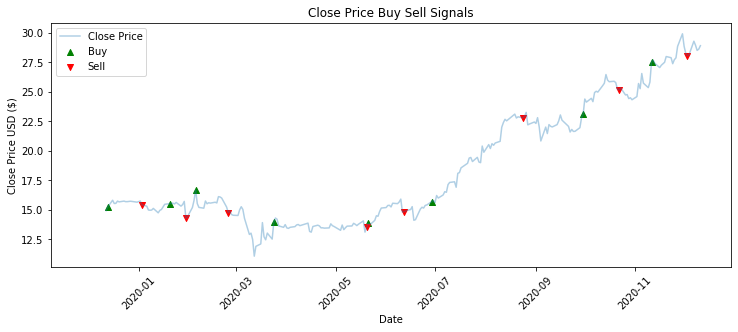

0.3859456761873812 0.9383377968103557


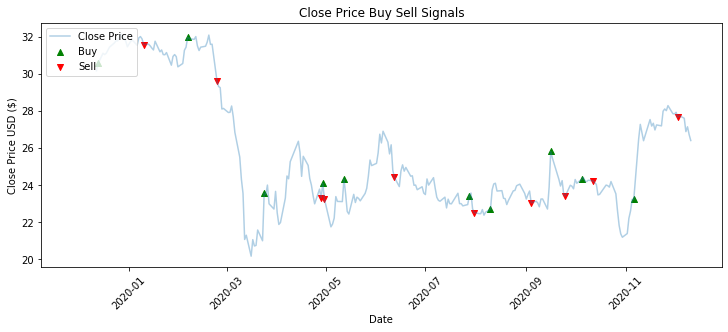

-0.035170172688145596 -0.12466844323291548


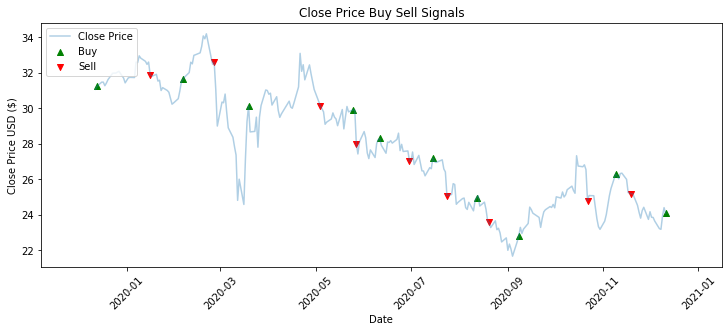

-0.14763983931260571 -0.22401027205777813


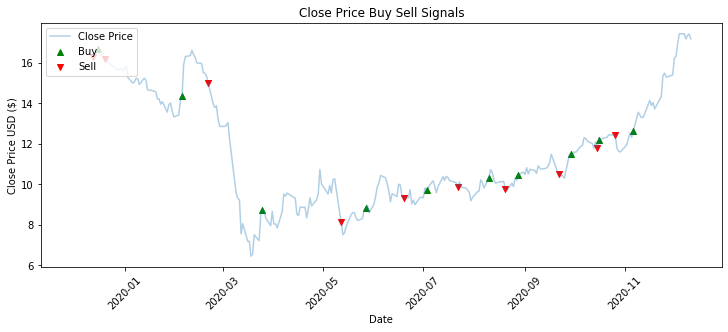

0.3771332599008548 0.05381222482351822


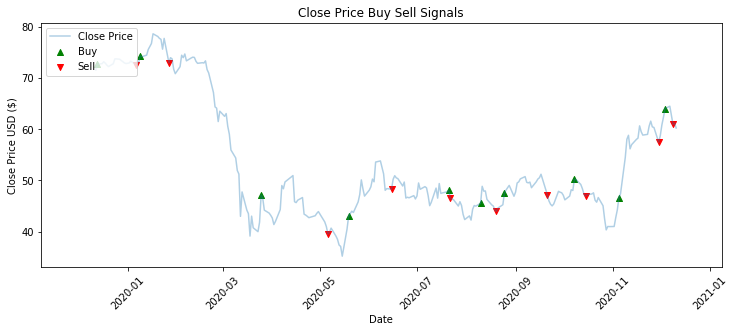

-0.0612059312800427 -0.15799770627448395


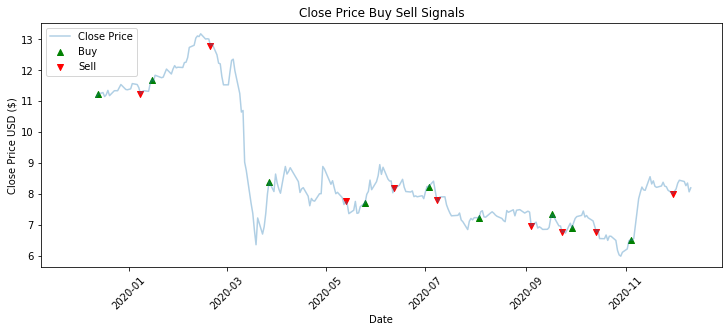

0.08840879518182931 -0.2641509886637857


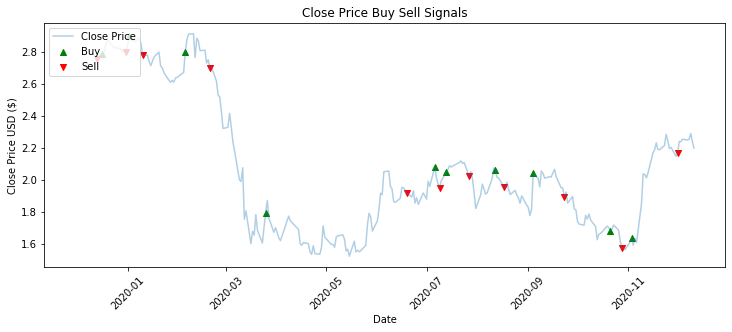

-0.005479539068765971 -0.20764238999934592


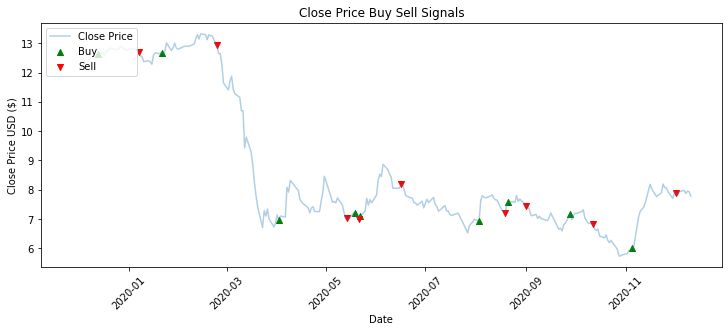

0.47693938252099444 -0.38165212445911745


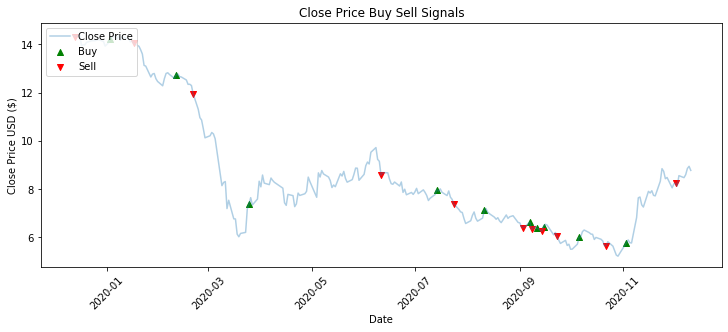

0.05465249287768703 -0.389217409880265


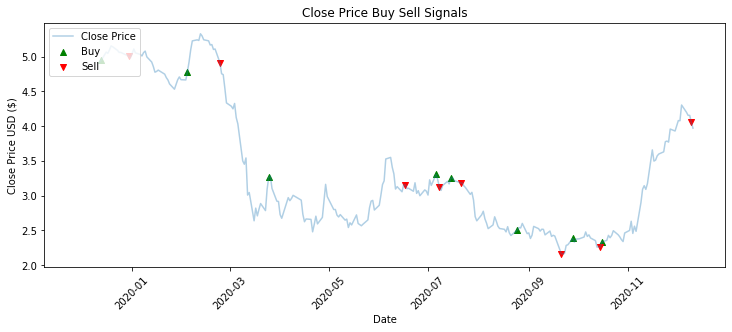

0.318353708363434 -0.19305020259038563


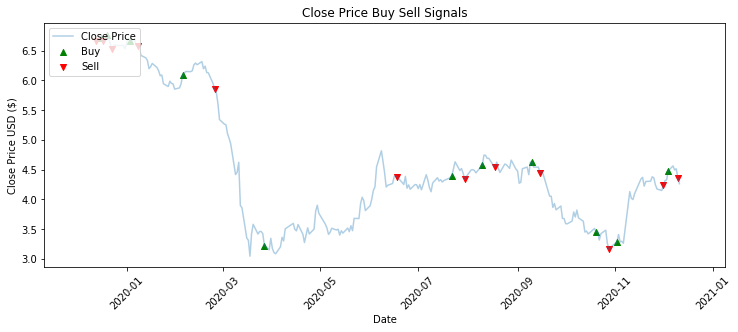

0.33654077955352757 -0.36182632919253555


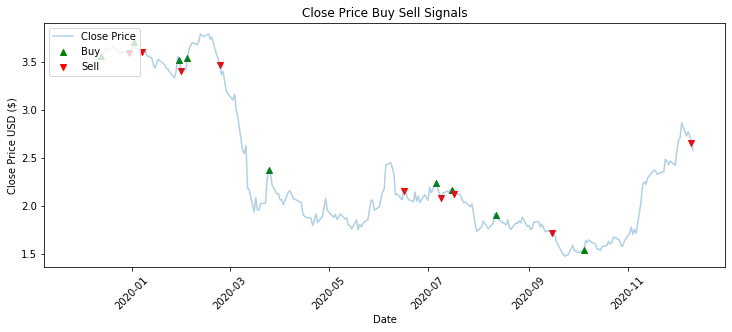

0.1976086289804977 -0.27143189035873727


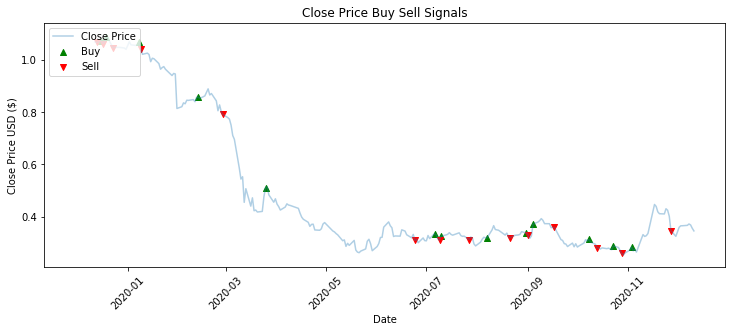

-0.5688248801893714 -0.6758583105902185


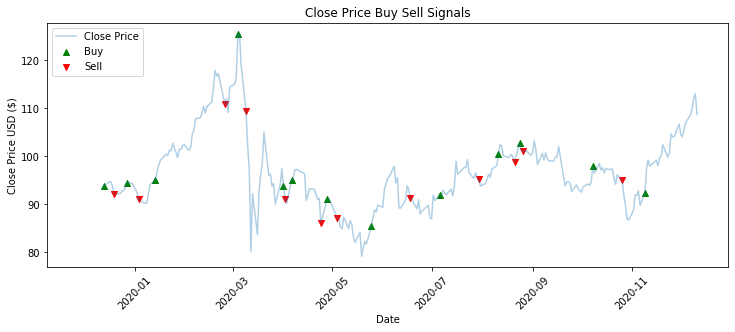

-0.002788353277439981 0.16505887880776693


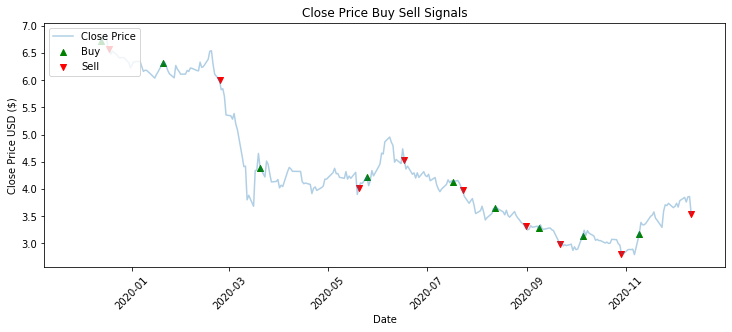

-0.27074759906149015 -0.4698938917963631


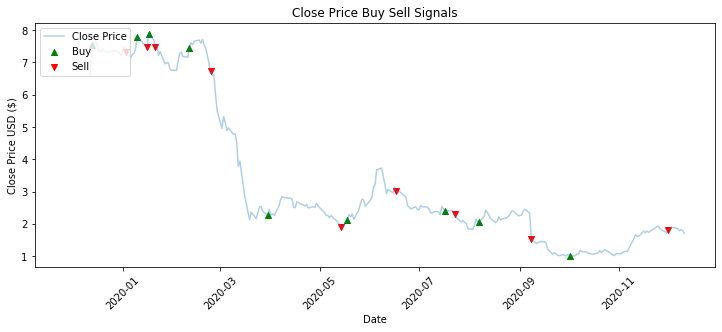

0.2260961663772285 -0.7399543404845115


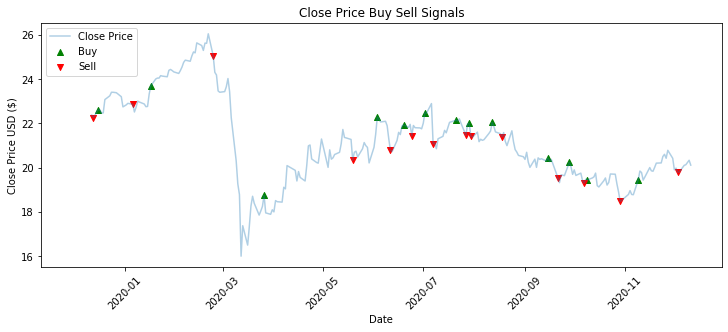

-0.2019873947290024 -0.10102816915939306


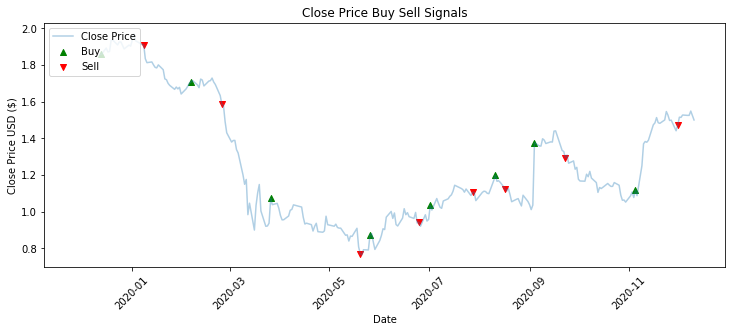

-0.07866882777853224 -0.19181032157220612


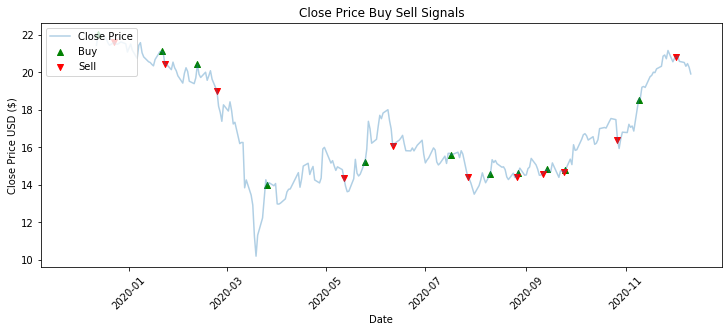

0.06549310739448733 -0.07136197054729965


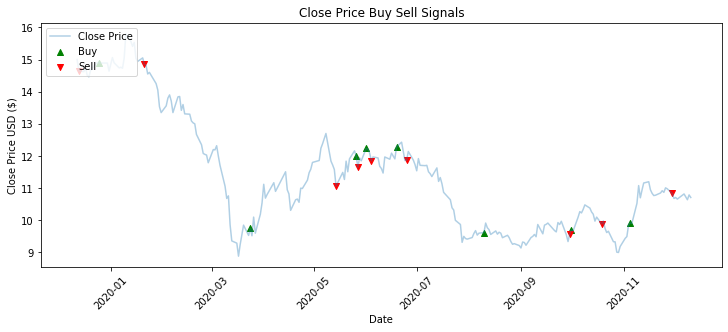

0.11230261787685847 -0.28599999745686844


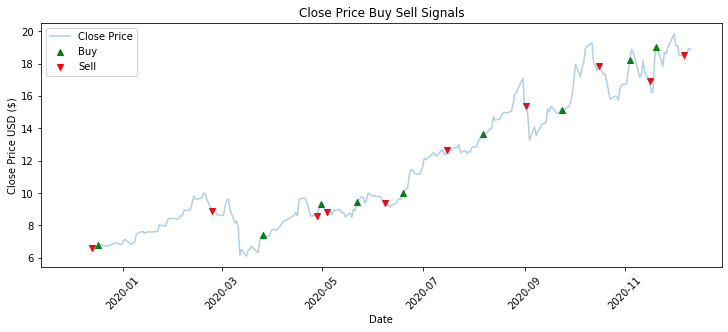

1.143364339747572 1.8299623745132512


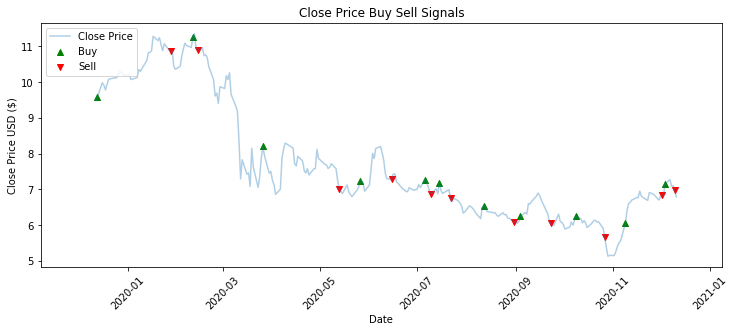

-0.23906772785892594 -0.28375524370001504


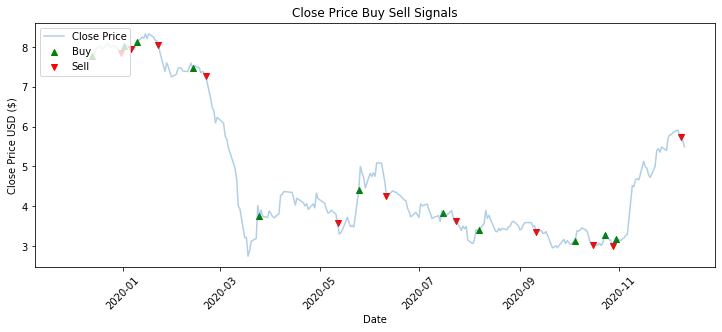

0.33023691147827017 -0.2909677567020539


In [6]:
profitabilities = []
for code in ibex_codes:
    a = MACD_profitability(code, "2019-12-12", "2020-12-12")
    profitabilities.append(a)

In [7]:
profitabilities

[(0.07369842886085864, -0.20595092794628622),
 (0.1434713743084184, 0.34519766441884725),
 (-0.04447858012091288, -0.1646772875007536),
 (-0.12951239124256264, 0.20817848435028652),
 (0.29060019912579893, 0.26262628424932455),
 (0.13174367175831403, -0.15353461339180663),
 (-0.09138134204715076, -0.045181634998608056),
 (2.1196134539135794, 1.466824083014191),
 (-0.12833421461205052, -0.24312055871841753),
 (-0.005553089273931833, -0.3476227456157369),
 (0.03648607124012915, -0.111970718782481),
 (0.018728611374204673, -0.049295719005662986),
 (0.3859456761873812, 0.9383377968103557),
 (-0.035170172688145596, -0.12466844323291548),
 (-0.14763983931260571, -0.22401027205777813),
 (0.3771332599008548, 0.05381222482351822),
 (-0.0612059312800427, -0.15799770627448395),
 (0.08840879518182931, -0.2641509886637857),
 (-0.005479539068765971, -0.20764238999934592),
 (0.47693938252099444, -0.38165212445911745),
 (0.05465249287768703, -0.389217409880265),
 (0.318353708363434, -0.1930502025903856

In [8]:
success_fail = []
for i in profitabilities:
    if i[0] > i[1]:
        success_fail.append("S")
    elif i[0] < i[1]:
        success_fail.append("F")
    else:
        success_fail.append("NaN")

In [9]:
df = pd.DataFrame(np.array(success_fail), columns = ["Success"])

In [10]:
df.Success.value_counts()

S    28
F     7
Name: Success, dtype: int64

In [11]:
profitabilities_OBV = []
profitabilities_real = []
for i in profitabilities: 
    profitabilities_OBV.append(i[0])
    profitabilities_real.append(i[1])

In [12]:
df["Profitabilities_OBV"] = profitabilities_OBV

In [13]:
df["Profitabilities_real"] = profitabilities_real

In [ ]:
df["Company"] = ibex_codes

In [15]:
df["Percentage Value"] = (df["Profitabilities_OBV"] + 10) - (df["Profitabilities_real"] + 10)

In [16]:
df["Percentage Value"].mean()

0.1901203419477567

This value means, that using MACD I would´ve gotten a 19% higher return of my investment vs buying every single stock at the beginning of the year and selling it today

In [17]:
df

,Success,Profitabilities_OBV,Profitabilities_real,Percentage Value
0,S,0.073698,-0.205951,0.279649
1,F,0.143471,0.345198,-0.201726
2,S,-0.044479,-0.164677,0.120199
3,F,-0.129512,0.208178,-0.337691
4,S,0.290600,0.262626,0.027974
5,S,0.131744,-0.153535,0.285278
6,F,-0.091381,-0.045182,-0.046200
7,S,2.119613,1.466824,0.652789
8,S,-0.128334,-0.243121,0.114786
9,S,-0.005553,-0.347623,0.342070


Objetivo si da tiempo: índices bursátiles más grandes o grupos de valores de bolsa más grandes. Para asegurarnos que no es azar lo que está ocurriendo. 